In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
# Read the data from a CSV file
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


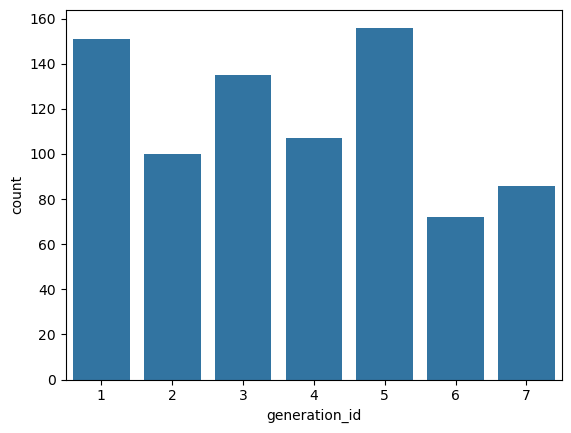

In [7]:
# A semicolon (;) at the end of the statement will supress printing the plotting information
sb.countplot(data=pokemon, x='generation_id');

### Example 2. Create a vertical bar chart using Seaborn, with a uniform single color

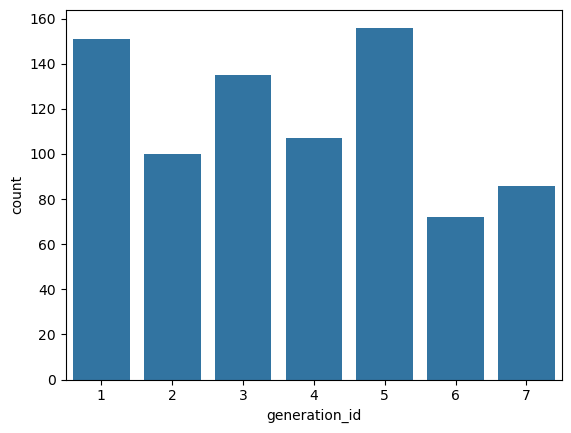

In [9]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

# Use the `color` argument
sb.countplot(data=pokemon, x='generation_id', color=base_color);

### Example 3. Create a vertical bar chart using Matplotlib, with a uniform single color

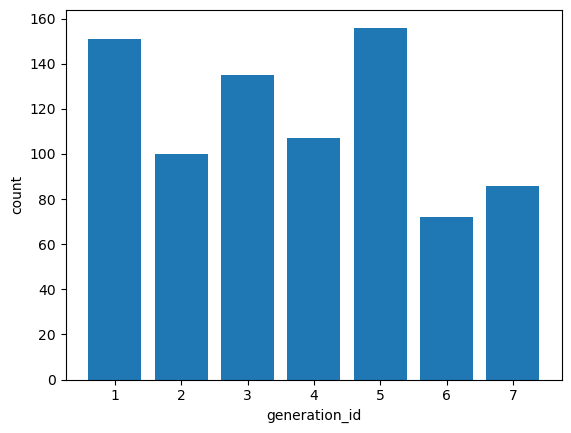

In [11]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

### Example 4. Static and dynamic ordering of the bars in a bar chart using seaborn.countplot()

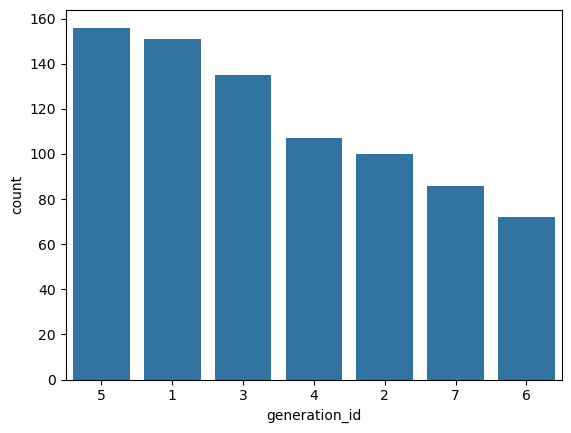

In [13]:
# Static-ordering the bars
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,2,7,6]);

# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = pokemon['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

### Example 5. Rotate the category labels (not axes)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'grass'),
  Text(1, 0, 'fire'),
  Text(2, 0, 'water'),
  Text(3, 0, 'bug'),
  Text(4, 0, 'normal'),
  Text(5, 0, 'poison'),
  Text(6, 0, 'electric'),
  Text(7, 0, 'ground'),
  Text(8, 0, 'fairy'),
  Text(9, 0, 'fighting'),
  Text(10, 0, 'psychic'),
  Text(11, 0, 'rock'),
  Text(12, 0, 'ghost'),
  Text(13, 0, 'ice'),
  Text(14, 0, 'dragon'),
  Text(15, 0, 'dark'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'flying')])

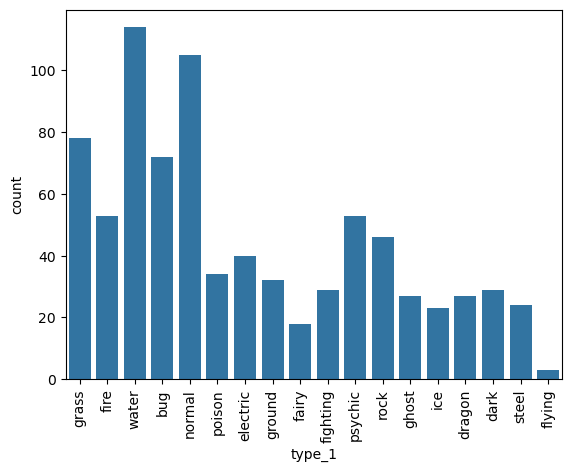

In [15]:
# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1', color=base_color);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)

### Example 6. Rotate the axes clockwise

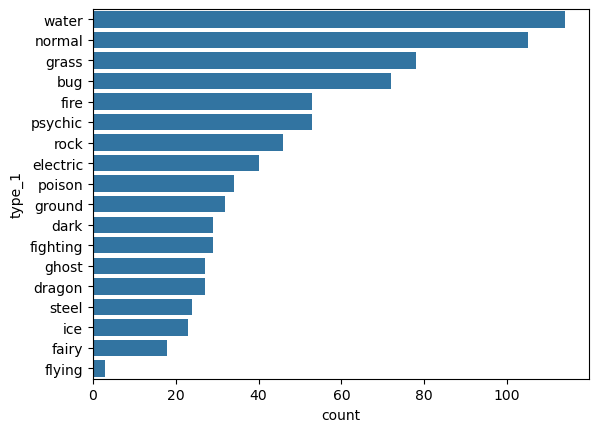

In [17]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

It is essential to understand the parameters involved:

id_vars - It is a tuple representing the column(s) to use as identifier variables.
value_vars - It is tuple representing the column(s) to unpivot (remove, out of place).
var_name - It is a name of the new column.
value_name - It is a name to use for the ‘value’ of the columns that are unpivoted.

In [28]:
DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)


NameError: name 'DataFrame' is not defined

In [61]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
pkmn_types.head(10)
#pkmn_types.shape

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [63]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
type_counts

type
water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: count, dtype: int64

In [65]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object', name='type')

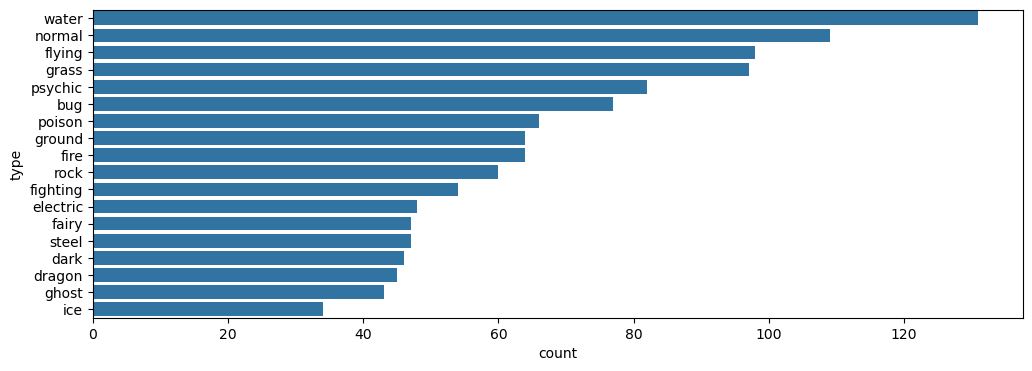

In [67]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

### Example 2. Plot a bar chart having the proportions, instead of the actual count, on one of the axes.
### Example 2 - Step 1. Find the maximum proportion of bar

In [69]:
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


C:\Users\habob\AppData\Local\Temp\ipykernel_5872\1823425749.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_type_count = type_counts[0]


### Example 2 - Step 2. Create an array of evenly spaced proportioned values

In [73]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

### Example 2 - Step 3. Create a list of String values that can be used as tick labels.

In [76]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

### Example 2 - Step 4. Plot the bar chart, with new x-tick labels

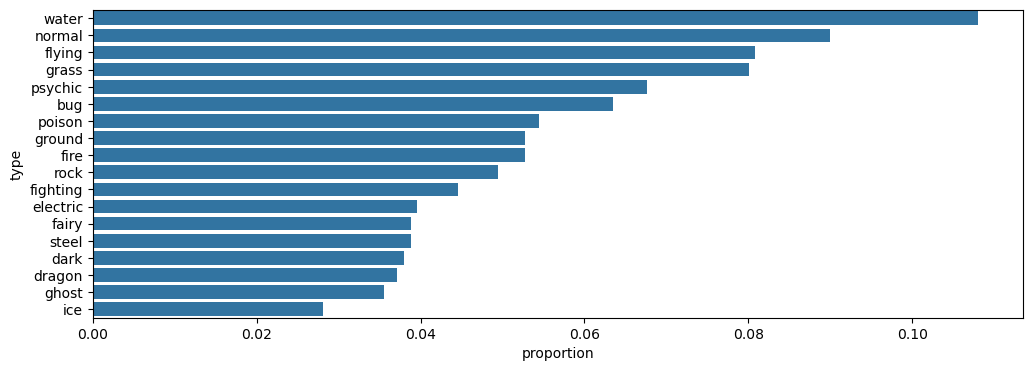

In [79]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

### Example 3. Print the text (proportion) on the bars of a horizontal plot.

C:\Users\habob\AppData\Local\Temp\ipykernel_5872\3220599668.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = type_counts[i]


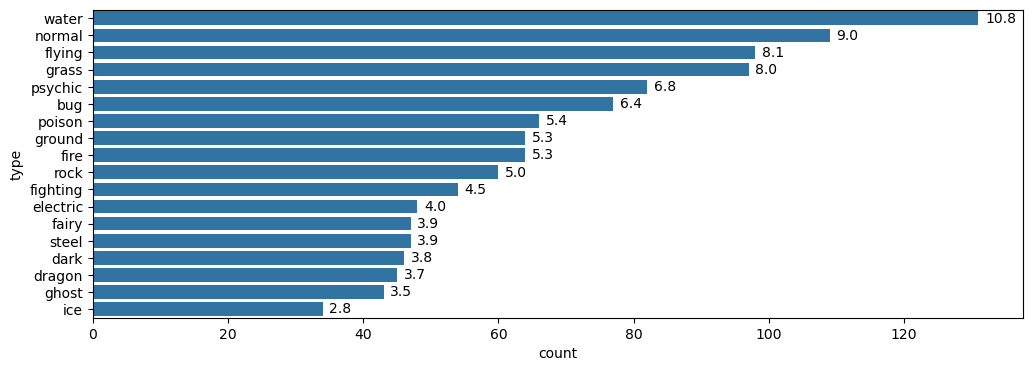

In [81]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

### Example 4. Print the text (proportion) below the bars of a Vertical plot.

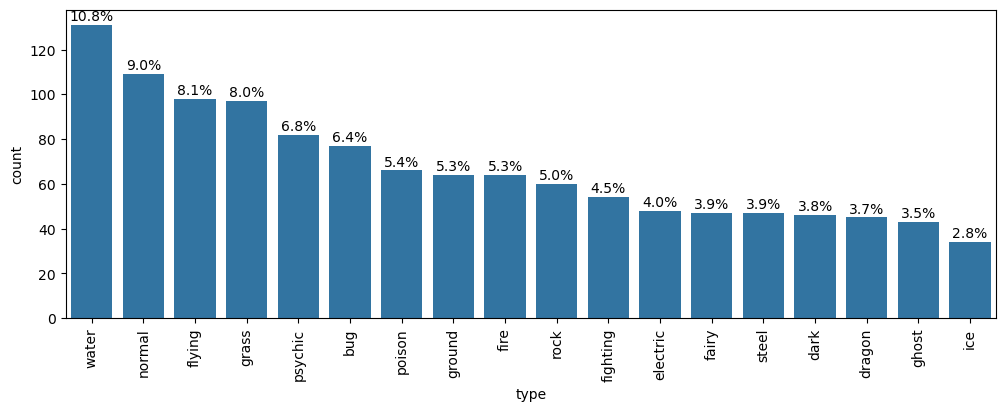

In [84]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

In [85]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

### Example 1. Plot a simple Pie chart

(-1.099999741140388,
 1.0999975725922118,
 -1.0999974358356632,
 1.0999998778969364)

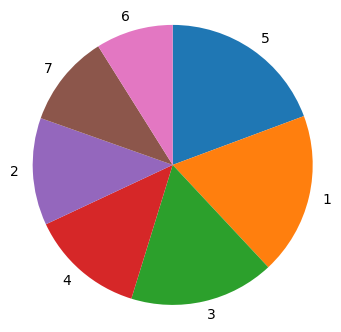

In [88]:
# Use the same pokemon dataset
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square')

### Example 2. Plot a simple Donut plot

(-1.099999741140388,
 1.0999975725922118,
 -1.0999974358356632,
 1.0999998778969364)

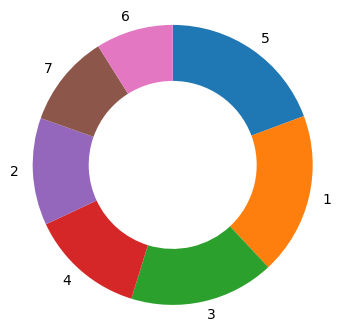

In [93]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

### Example 1. Plot a default histogram

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

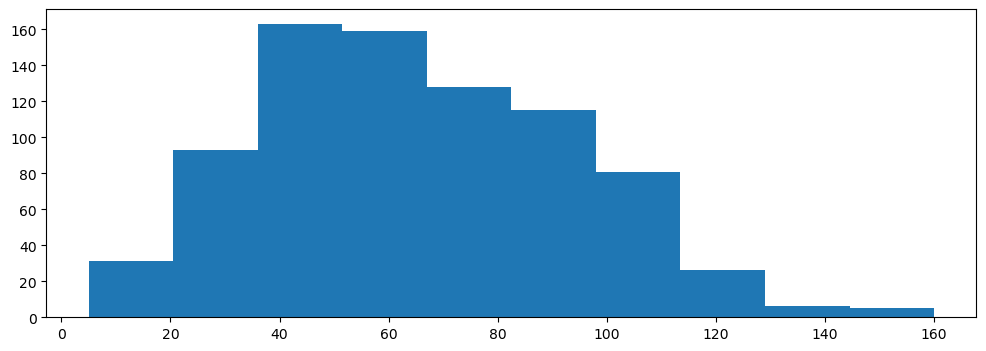

In [96]:
# We have intentionally not put a semicolon at the end of the statement below to see the bar-width
plt.hist(data = pokemon, x = 'speed')

### Example 2. Histogram with fixed number of bins

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <BarContainer object of 20 artists>)

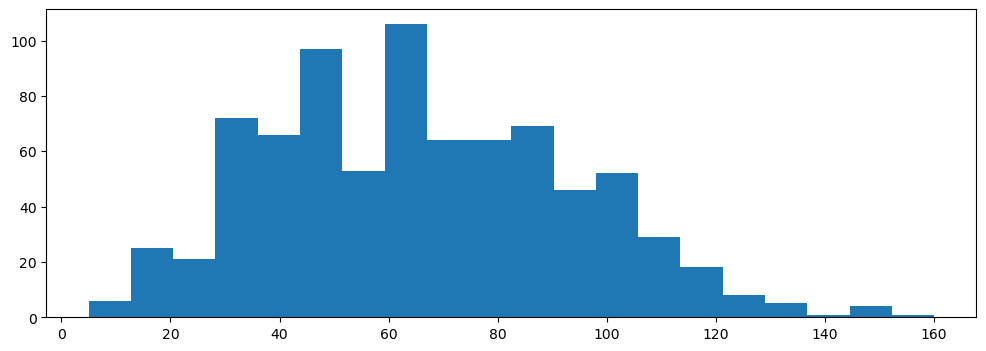

In [99]:
plt.hist(data = pokemon, x = 'speed', bins = 20)

### Example 3. Histogram with dynamic number of bins

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.]),
 <BarContainer object of 32 artists>)

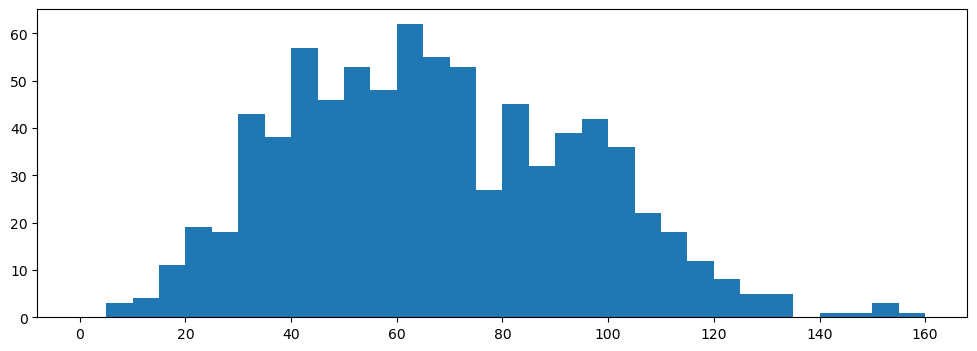

In [102]:
# Create bins with step-size 5
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins)

## Alternative Approach - Seaborn's displot()

seaborn.distplot(Series, bins, kde, hist_kws)

### Example 4. Plot the similar histogram with Seaborn's

C:\Users\habob\AppData\Local\Temp\ipykernel_5872\2727986321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(pokemon['speed'])
C:\Users\habob\AppData\Local\Temp\ipykernel_5872\2727986321.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(pokemon['speed'], kde=False)


<Axes: xlabel='speed', ylabel='Density'>

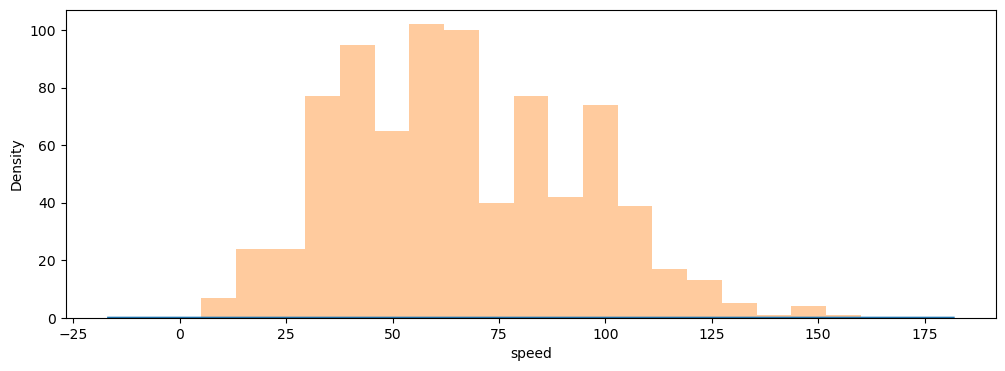

In [108]:
sb.distplot(pokemon['speed'])

# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sb.distplot(pokemon['speed'], kde=False)

### Example 5. Plot two histograms side-by-side

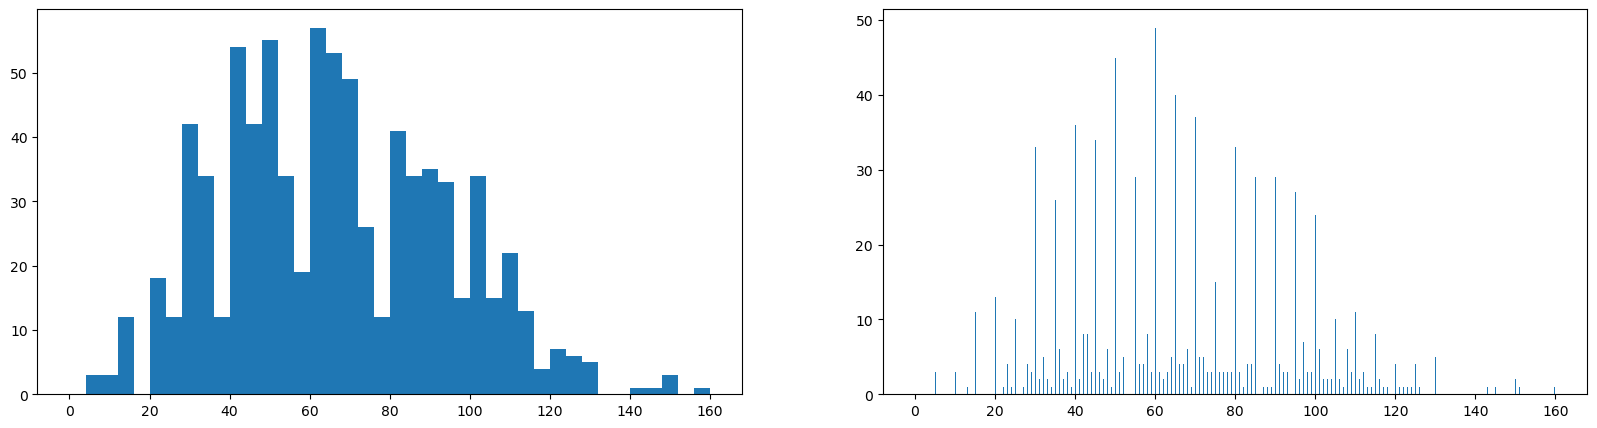

In [115]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);
#This example puts two plots side by side through use of the [`subplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The [`figure()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots. (More details on figures and subplots are coming up next in the lesson.)

### Example 2. Demonstrate figure.add_axes() and axes.hist()

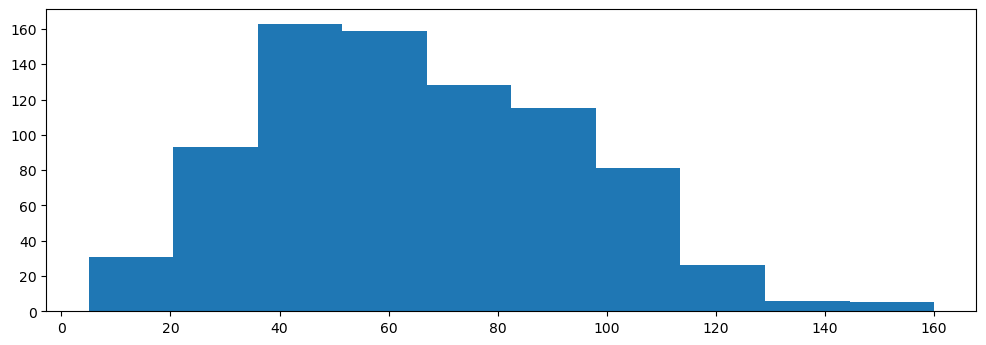

In [118]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

### Example 2. Use axes with seaborn.countplot()

<Axes: xlabel='generation_id', ylabel='count'>

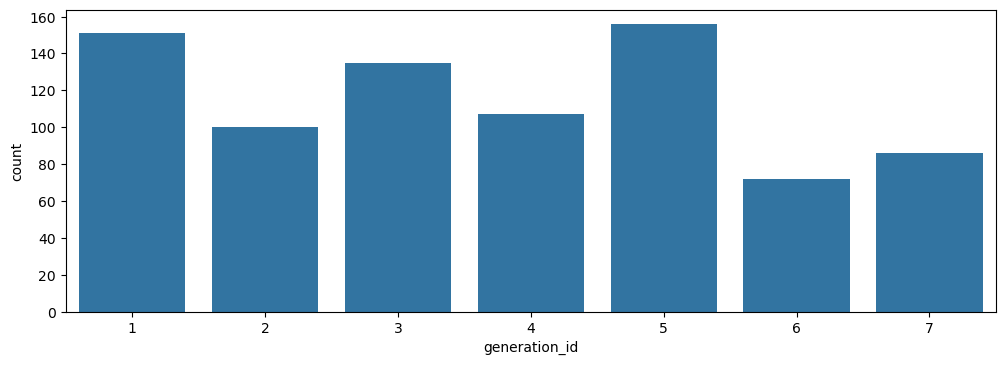

In [121]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax)

### Example 3. Sub-plots

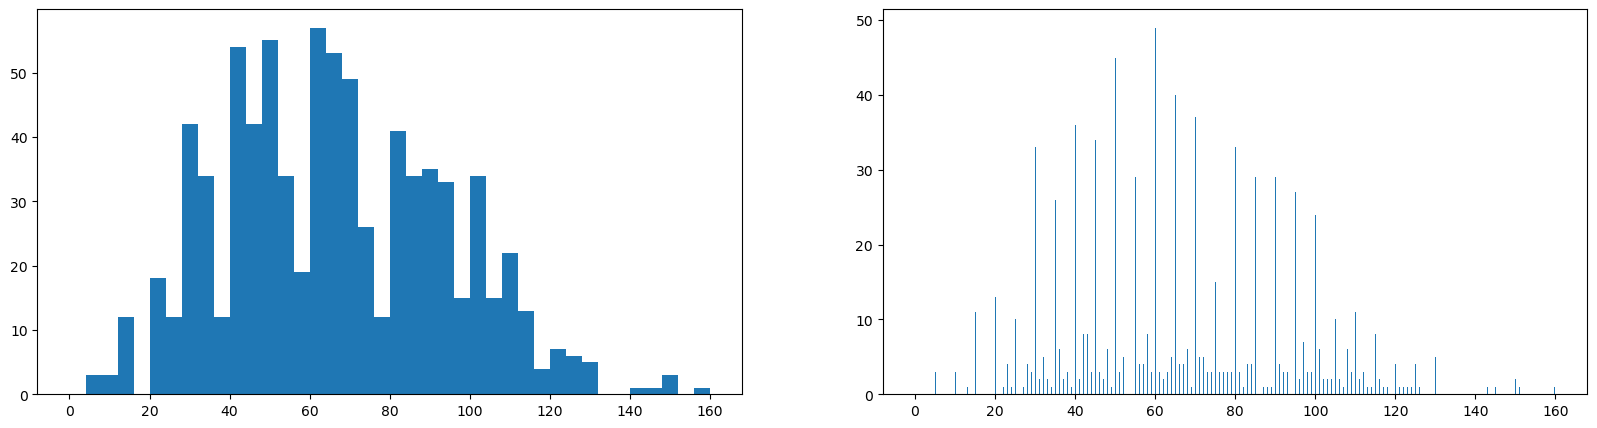

In [124]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

### Example 4. Demonstrate pyplot.sca() and pyplot.text() to generate a grid of subplots

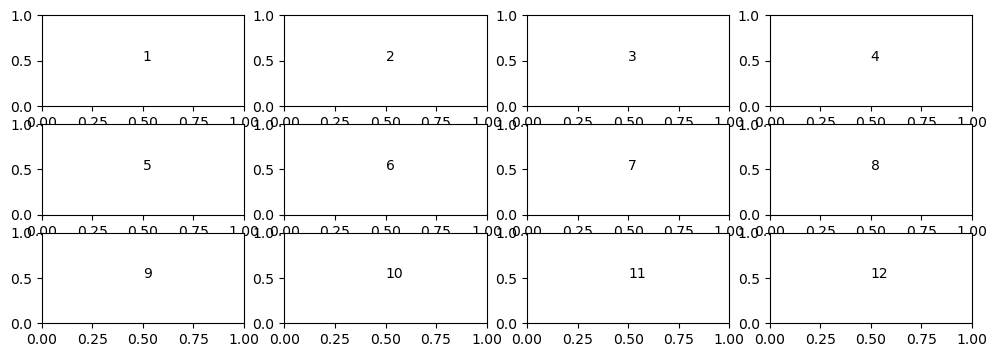

In [127]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

### Example 2. Plot the histogram with a changed axis limit.

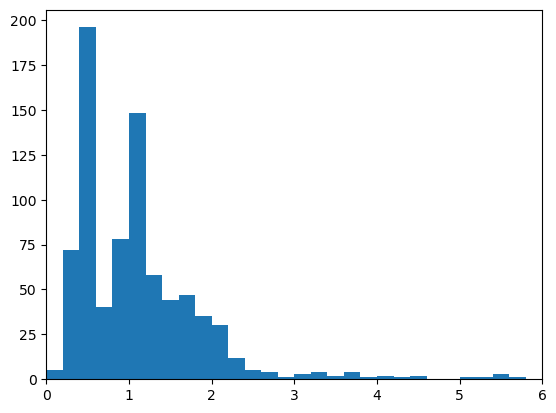

In [8]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins);

# Set the upper and lower bounds of the bins that are displayed in the plot
# Refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,6));

### Example 1 - Scale the x-axis to log-type

Text(0.5, 0, 'The x-axis limits NOT are changed. They are only scaled to log-type')

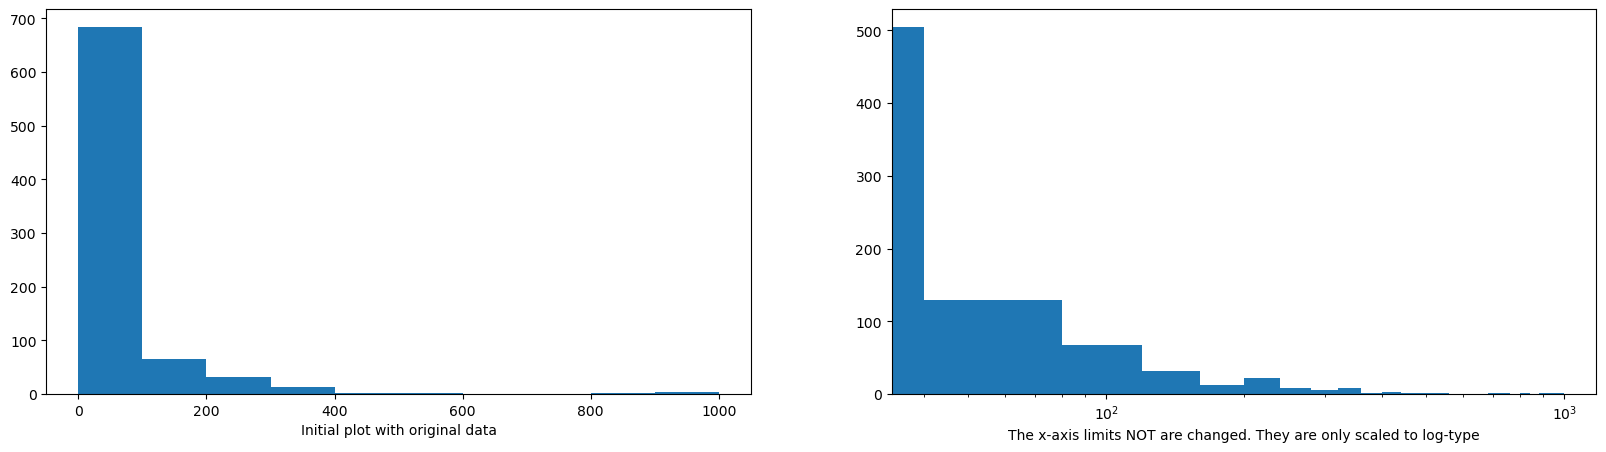

In [11]:


plt.figure(figsize = [20, 5])

## HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
## Display a label on the x-axis
plt.xlabel('Initial plot with original data')

## HISTOGRAM ON RIGHT 
plt.subplot(1, 2, 2)

## Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

## The argument in the xscale() represents the axis scale type to apply.
## The possible values are: {"linear", "log", "symlog", "logit", ...}
## Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type')

In [13]:
## Describe the data
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

Notice two things about the right histogram of example 1 above, now.

Even though the data is on a log scale, the bins are still linearly spaced. This means that they change size from wide on the left to thin on the right, as the values increase multiplicative. Matplotlib's xscale(opens in a new tab) function includes a few built-in transformations: we have used the 'log' scale here.
Secondly, the default label (x-axis ticks) settings are still somewhat tricky to interpret and are sparse as well.
To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10. Depending on what you are plotting, a different base power like 2 might be useful instead.

To address the second issue of interpretation of x-axis ticks, the scale transformation is the solution. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units.

Let's see another example below.

### Example 2 - Scale the x-axis to log-type, and change the axis limit.

In [17]:
## Transform the describe() to a scale of log10
## Documentation: [numpy `log10`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html)
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

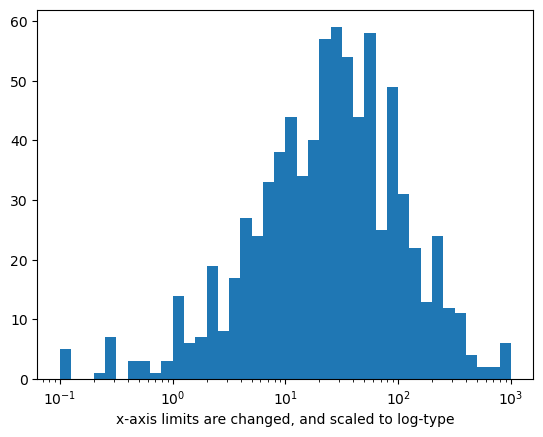

In [19]:
## Axis transformation
## Bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins);

## The argument in the xscale() represents the axis scale type to apply.
## The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

## Apply x-axis label
## Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type')

### Example 3 - Scale the x-axis to log-type, change the axis limits, and increase the x-ticks

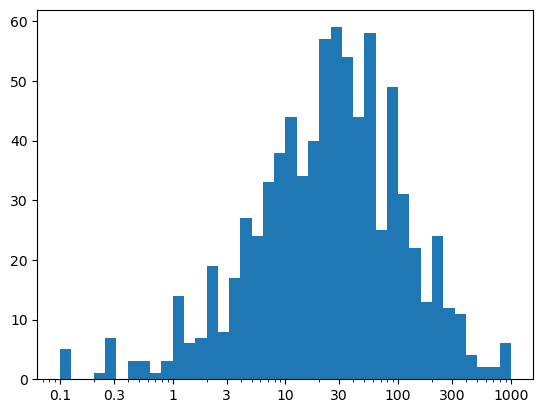

In [22]:
## Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

## Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
## Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

## Plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins);

## The argument in the xscale() represents the axis scale type to apply.
## The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

## Apply x-ticks
plt.xticks(ticks, labels);

### Example 4. Custom scaling the given data Series, instead of using the built-in log scale

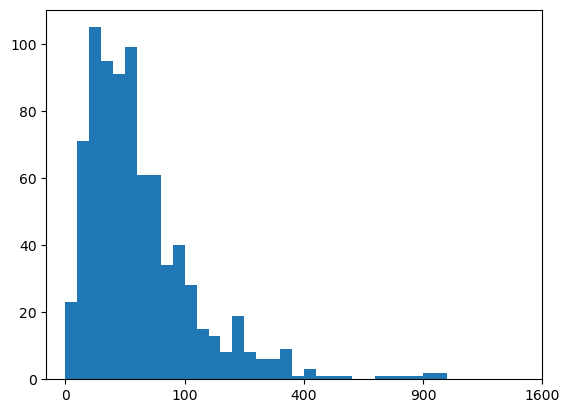

In [25]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

## Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

## Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

## Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

## Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

### Example 1. Plot the Kernel Density Estimation (KDE)

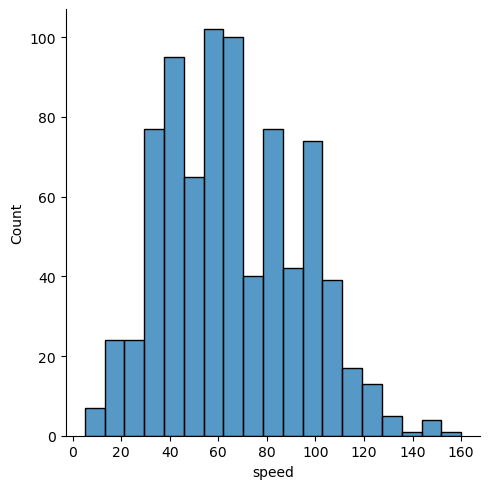

In [28]:
# The pokemon dataset is available to download at the bottom of this page.
# The kind argument can take any one value from {“hist”, “kde”, “ecdf”}.
sb.displot(pokemon['speed'], kind='hist');
# Use the 'kde' kind for kernel density estimation
# sb.displot(pokemon['speed'], kind='kde');

### Example 2. Demonstrating distplot() and rugplot() to plot the KDE

C:\Users\habob\AppData\Local\Temp\ipykernel_27600\3569169983.py:19: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(data, bw_method=1/5, kernel='tri')


(0.0, 0.17)

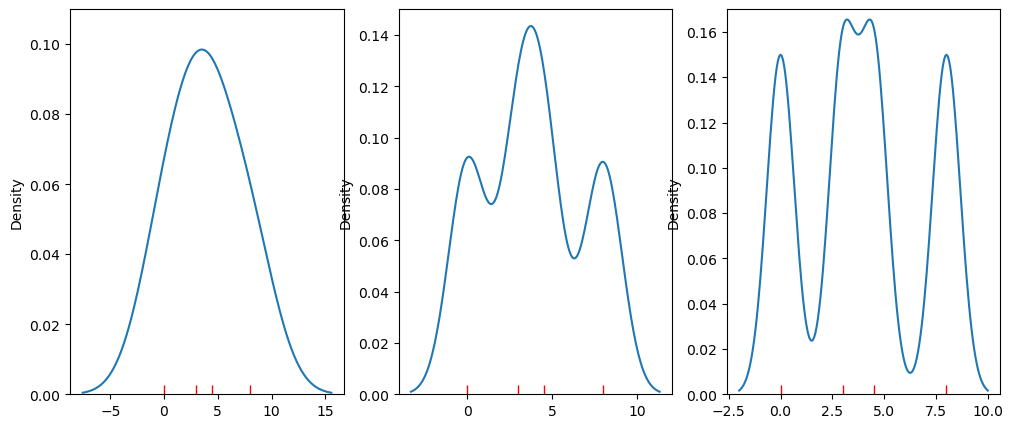

In [31]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize=[12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.rugplot(data, color='r')
sb.kdeplot(data)
plt.ylim(0, 0.11)

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.rugplot(data, color='r')
sb.kdeplot(data, bw_method=1/3)
plt.ylim(0, 0.15)

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.rugplot(data, color='r')
sb.kdeplot(data, bw_method=1/5, kernel='tri')
plt.ylim(0, 0.17)